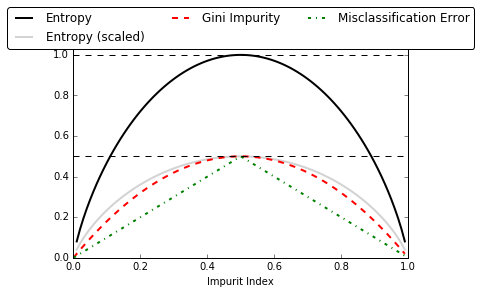

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p) * (1 -(p)) + (1 - p)*(1 - (1 - p))

def entropy(p):
    return - p*np.log2(p) - (1 - p) * np.log2((1 -p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 
                        'Misclassification Error'],
                        ['-', '-', '--', '-.'],
                        ['black','lightgray', 'red', 'green', 'cyan']):
   line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, 
          shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('Impurit Index')
plt.show()




In [4]:
-

In [5]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

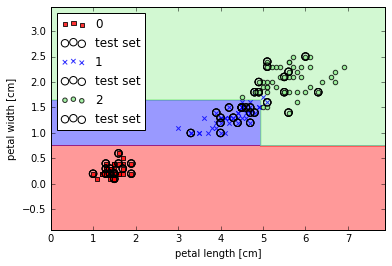

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, 
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()



In [36]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               feature_names=['petal length', 'petal widith'])

In [37]:
from subprocess import call
call (['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

-1073741515

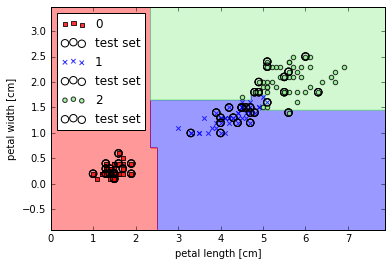

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest =  RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, 
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()